# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [27]:
#1
import pandas as pd

url = 'https://raw.githubusercontent.com/rickyjooooooe/DATASET/refs/heads/main/penguins_size.csv'
df = pd.read_csv(url)
df.sample(10)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
59,Adelie,Biscoe,37.6,19.1,194.0,3750.0,MALE
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,MALE
25,Adelie,Biscoe,35.3,18.9,187.0,3800.0,FEMALE
236,Gentoo,Biscoe,42.0,13.5,210.0,4150.0,FEMALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
264,Gentoo,Biscoe,50.5,15.9,222.0,5550.0,MALE
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
250,Gentoo,Biscoe,47.3,15.3,222.0,5250.0,MALE
182,Chinstrap,Dream,40.9,16.6,187.0,3200.0,FEMALE
36,Adelie,Dream,38.8,20.0,190.0,3950.0,MALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [6]:
#2 There are some missing values in the dataset, specifically in culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, and sex. You will need to address these missing values through imputation or removal.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [7]:
#3 Ringkasan statistik ini menunjukkan bahwa meskipun sebagian besar variabel memiliki distribusi yang relatif normal, variabel body_mass_g memiliki sebaran yang lebih luas. Perbedaan rentang antar variabel mengindikasikan bahwa beberapa fitur mungkin perlu di-scaling untuk keperluan pemodelan. Informasi ini membantu dalam memahami karakteristik penguin berdasarkan spesiesnya dan dapat membantu dalam pemilihan fitur untuk tugas klasifikasi.
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [8]:
#4
# Display counts of each unique value in the 'species' column, including NaN
species_counts = df['species'].value_counts(dropna=False)
print("Species Counts:\n", species_counts)

# Display counts of each unique value in the 'island' column, including NaN
island_counts = df['island'].value_counts(dropna=False)
print("\nIsland Counts:\n", island_counts)

# Display counts of each unique value in the 'sex' column, including NaN
sex_counts = df['sex'].value_counts(dropna=False)
print("\nSex Counts:\n", sex_counts)


Species Counts:
 species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Island Counts:
 island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

Sex Counts:
 sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [28]:
#5
# Remove any rows with null values (if they exist)
df_cleaned = df.dropna()

# Display the number of remaining null values to confirm they are removed
print("Null values per column after dropna:\n", df_cleaned.isnull().sum())


Null values per column after dropna:
 species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


6. Create your own insightful visualization and explain it in at least 2 sentences

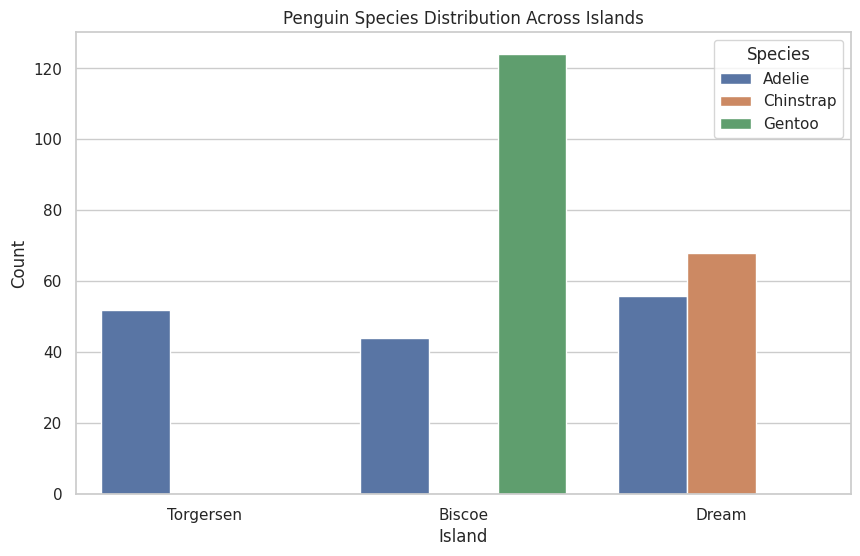

In [10]:
#6 This count plot shows how penguin species are distributed across the three islands in the dataset: Dream, Torgersen, and Biscoe.
# By observing the plot, we can see if certain islands have a higher presence of specific species, which could provide insights into the habitat preferences of each penguin species.
# Additionally, this information can help verify if the dataset is balanced or if certain islands or species dominate the dataset.

import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create a count plot for species distribution across islands
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='island', hue='species')
plt.title("Penguin Species Distribution Across Islands")
plt.xlabel("Island")
plt.ylabel("Count")
plt.legend(title="Species", loc='upper right')
plt.show()


7. Check unique value of our target variable

In [11]:
#7
# Display unique values in the 'species' column
unique_species = df['species'].unique()
print("Unique species:", unique_species)


Unique species: ['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [33]:
#8
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()


# Encode 'island' and 'sex' (feature variables)
df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])

# Display the first few rows of the updated DataFrame to show the results
print("Encoded Data Sample:\n", df.head())


Encoded Data Sample:
    species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        0       2              39.1             18.7              181.0   
1        0       2              39.5             17.4              186.0   
2        0       2              40.3             18.0              195.0   
3        0       2               NaN              NaN                NaN   
4        0       2              36.7             19.3              193.0   

   body_mass_g  sex  
0       3750.0    2  
1       3800.0    1  
2       3250.0    1  
3          NaN    3  
4       3450.0    1  


9. encode the target column and display the results

In [32]:
# Encode 'species' (target variable)
df['species'] = label_encoder.fit_transform(df['species'])
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
3,0,2,NaN,NaN,NaN,NaN,3
4,0,2,36.7,19.3,193.0,3450.0,1


10. create a heatmap to see the correlation and explain the conclusion

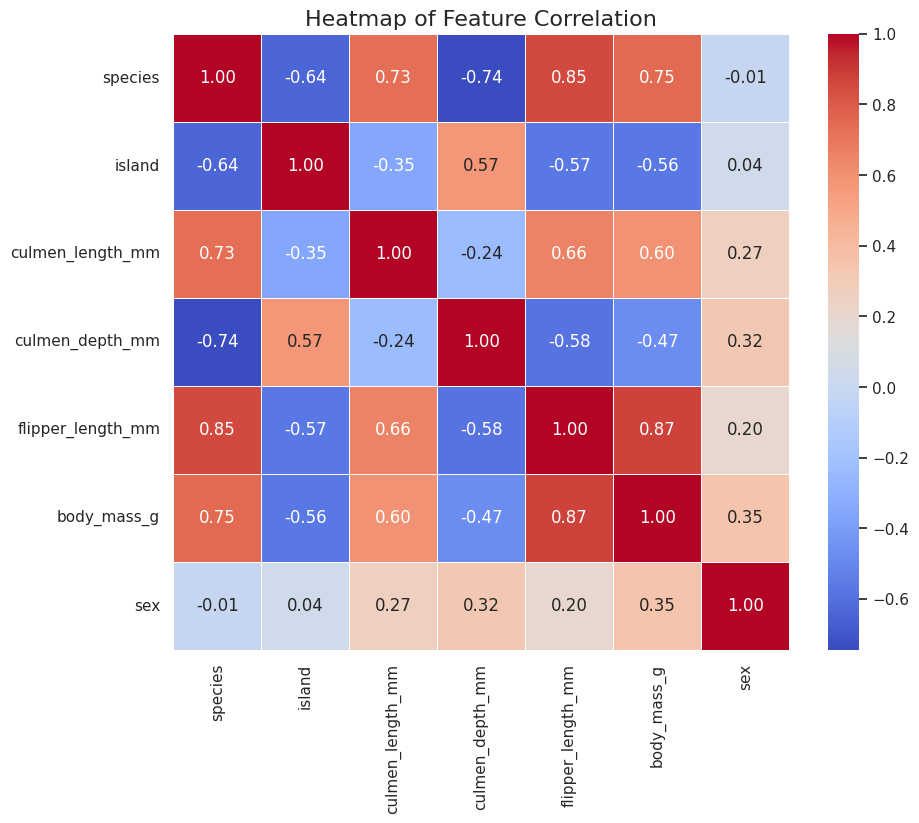

In [34]:
#10
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Anggap df adalah DataFrame yang sudah dimuat dengan dataset penguin

# Menghitung korelasi
correlation_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap of Feature Correlation', fontsize=16)

# Menampilkan heatmap
plt.show()


## Machine Learning

1. Splitting X and y

In [37]:
#1
# Menentukan fitur dan target
X = df.drop('species', axis=1)  # Fitur (semua kolom kecuali 'species')
y = df['species']                 # Target (kolom 'species')


2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [38]:
#2
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi set pelatihan dan pengujian (test size 20% dan random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memeriksa bentuk dari X_train dan X_test
print(X_train.shape, X_test.shape)


(275, 6) (69, 6)


In [39]:
#3
# Memeriksa bentuk dari X_train dan X_test
print(X_train.shape, X_test.shape)

(275, 6) (69, 6)


## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [40]:
#Criterion Entropy
#a
from sklearn.tree import DecisionTreeClassifier

# Model with Gini Index
gini_model = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_model.fit(X_train, y_train)

# Model with Entropy
entropy_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [41]:
#b
# Predictions
gini_predictions = gini_model.predict(X_test)
entropy_predictions = entropy_model.predict(X_test)


In [42]:
#c
from sklearn.metrics import accuracy_score

# Accuracy Scores
gini_accuracy = accuracy_score(y_test, gini_predictions)
entropy_accuracy = accuracy_score(y_test, entropy_predictions)

print(f"Gini Model Accuracy: {gini_accuracy:.2f}")
print(f"Entropy Model Accuracy: {entropy_accuracy:.2f}")


Gini Model Accuracy: 0.99
Entropy Model Accuracy: 0.97


In [43]:
#d
# Plotting Training and Testing Accuracy
train_accuracy_gini = gini_model.score(X_train, y_train)
test_accuracy_gini = gini_model.score(X_test, y_test)

train_accuracy_entropy = entropy_model.score(X_train, y_train)
test_accuracy_entropy = entropy_model.score(X_test, y_test)

print(f"Gini Model - Train Accuracy: {train_accuracy_gini:.2f}, Test Accuracy: {test_accuracy_gini:.2f}")
print(f"Entropy Model - Train Accuracy: {train_accuracy_entropy:.2f}, Test Accuracy: {test_accuracy_entropy:.2f}")


Gini Model - Train Accuracy: 1.00, Test Accuracy: 0.99
Entropy Model - Train Accuracy: 1.00, Test Accuracy: 0.97


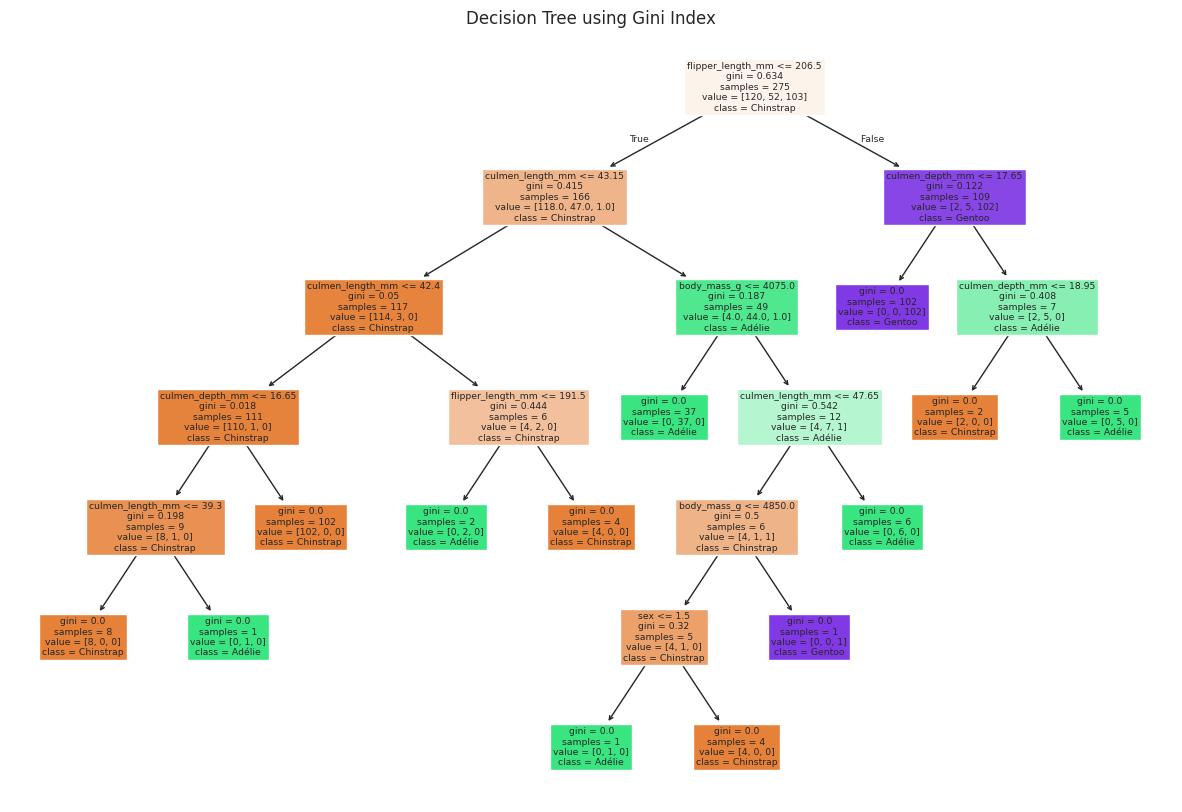

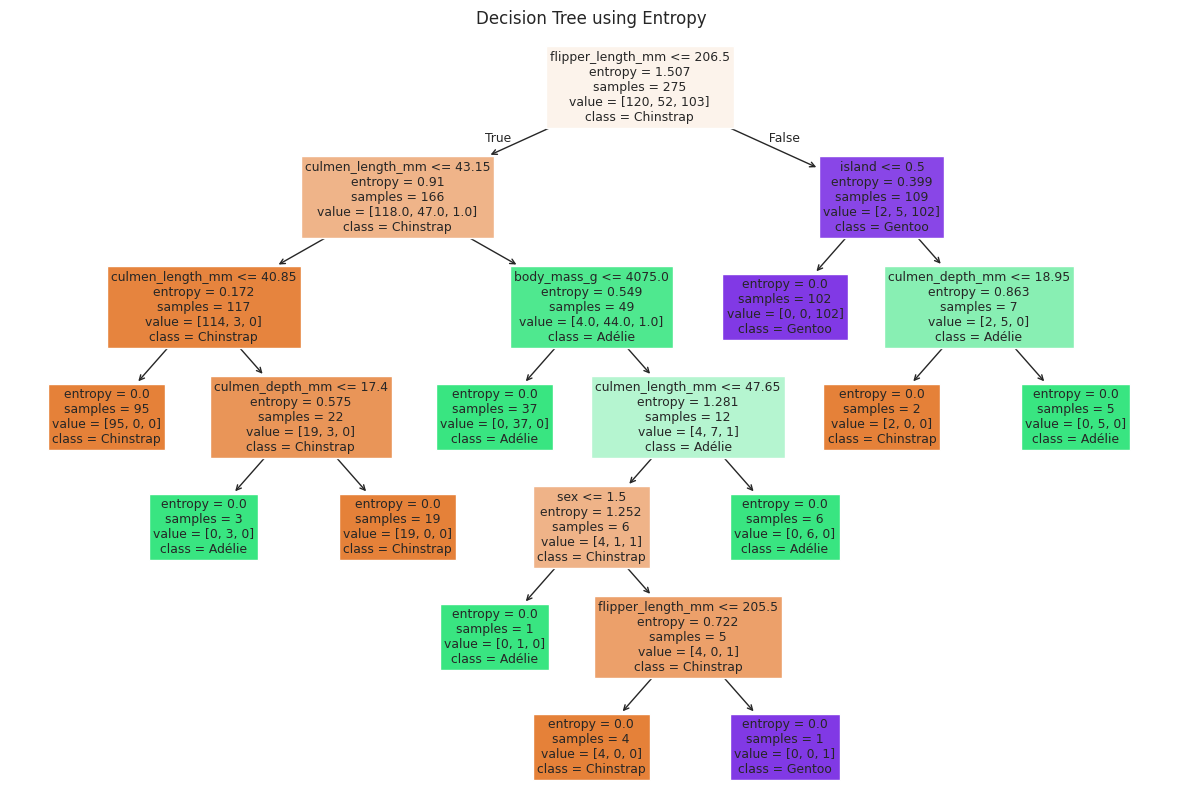

In [44]:
#e
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting Gini Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(gini_model, filled=True, feature_names=X.columns, class_names=['Chinstrap', 'Adélie', 'Gentoo'])
plt.title("Decision Tree using Gini Index")
plt.show()

# Plotting Entropy Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(entropy_model, filled=True, feature_names=X.columns, class_names=['Chinstrap', 'Adélie', 'Gentoo'])
plt.title("Decision Tree using Entropy")
plt.show()


2. Criterion Gini index

In [ ]:
#a

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
#b

In [ ]:
#c

Model accuracy score with criterion gini index: 0.9851


In [ ]:
#d

Training set score: 0.9738
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.117\nsamples = 49\nvalue = [2.0, 46.0, 1.0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 

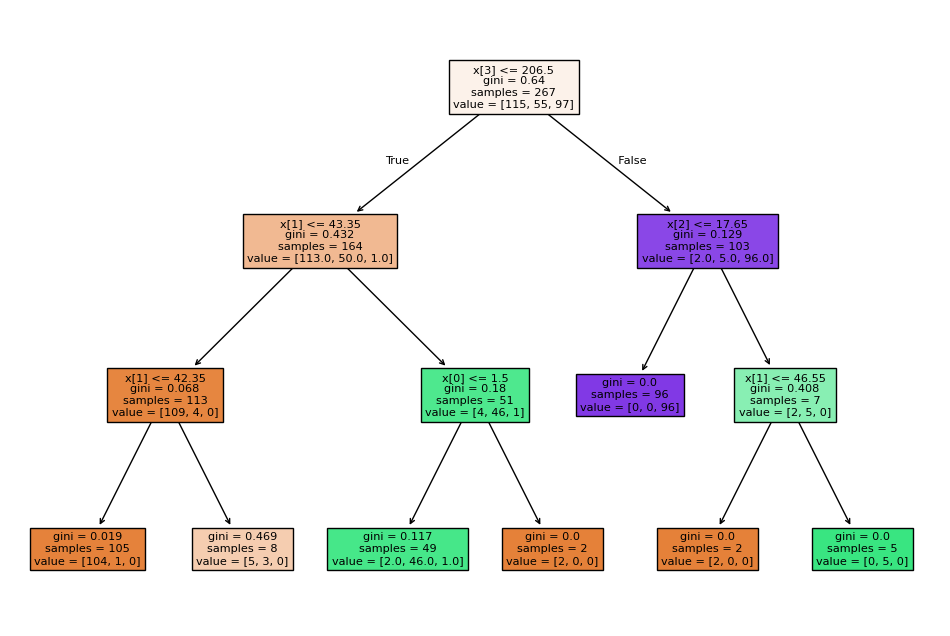

In [ ]:
#e

3. Confusion matrix and classification report of criterion Entropy and Gini index

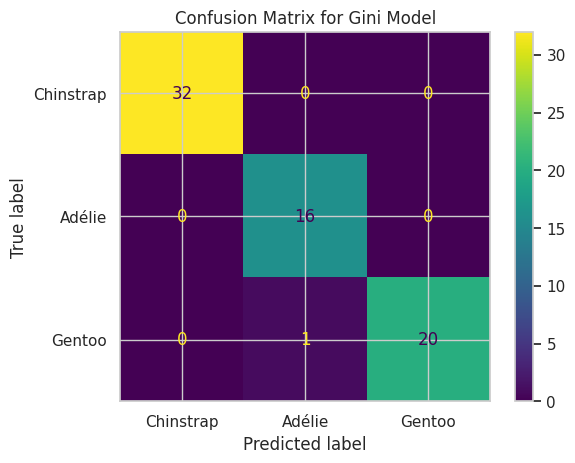

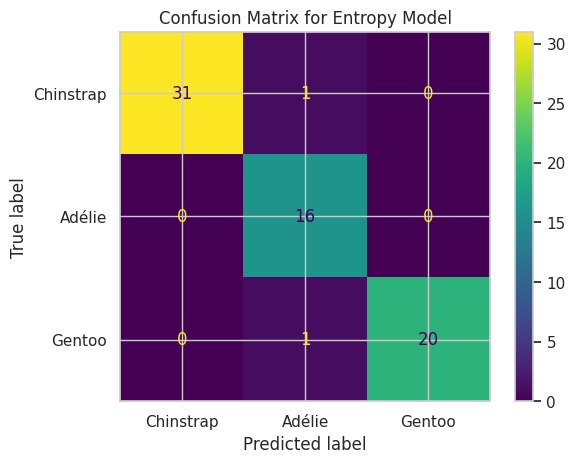

In [45]:
#f
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrices
gini_cm = confusion_matrix(y_test, gini_predictions)
entropy_cm = confusion_matrix(y_test, entropy_predictions)

# Plotting Confusion Matrix for Gini
ConfusionMatrixDisplay(confusion_matrix=gini_cm, display_labels=['Chinstrap', 'Adélie', 'Gentoo']).plot()
plt.title("Confusion Matrix for Gini Model")
plt.show()

# Plotting Confusion Matrix for Entropy
ConfusionMatrixDisplay(confusion_matrix=entropy_cm, display_labels=['Chinstrap', 'Adélie', 'Gentoo']).plot()
plt.title("Confusion Matrix for Entropy Model")
plt.show()


In [46]:
#g
from sklearn.metrics import classification_report

# Classification Reports
gini_report = classification_report(y_test, gini_predictions)
entropy_report = classification_report(y_test, entropy_predictions)

print("Gini Model Classification Report:\n", gini_report)
print("Entropy Model Classification Report:\n", entropy_report)


Gini Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.94      1.00      0.97        16
           2       1.00      0.95      0.98        21

    accuracy                           0.99        69
   macro avg       0.98      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69

Entropy Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.89      1.00      0.94        16
           2       1.00      0.95      0.98        21

    accuracy                           0.97        69
   macro avg       0.96      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [ ]:
#h

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [48]:
#a
from sklearn.naive_bayes import GaussianNB
# Drop rows with missing values
df_cleaned = df.dropna()

# Split the cleaned dataset into features and target variable
X = df_cleaned.drop('species', axis=1)  # Replace 'species' with your target variable
y = df_cleaned['species']

# Split into training and test sets again
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Defining the model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)


GaussianNB()

In [49]:
#b
# Predictions
naive_bayes_predictions = naive_bayes_model.predict(X_test)


Naive Bayes Model Accuracy: 0.96


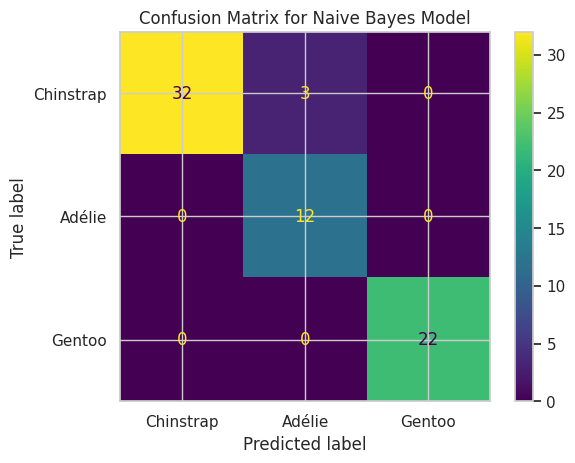

In [50]:
#c
from sklearn.metrics import accuracy_score

# Accuracy Score
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
print(f"Naive Bayes Model Accuracy: {naive_bayes_accuracy:.2f}")


#d
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
naive_bayes_cm = confusion_matrix(y_test, naive_bayes_predictions)

# Plotting Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=naive_bayes_cm, display_labels=['Chinstrap', 'Adélie', 'Gentoo']).plot()
plt.title("Confusion Matrix for Naive Bayes Model")
plt.show()


In [51]:
#e
from sklearn.metrics import classification_report

# Classification Report
naive_bayes_report = classification_report(y_test, naive_bayes_predictions)
print("Naive Bayes Model Classification Report:\n", naive_bayes_report)


Naive Bayes Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.80      1.00      0.89        12
           2       1.00      1.00      1.00        22

    accuracy                           0.96        69
   macro avg       0.93      0.97      0.95        69
weighted avg       0.97      0.96      0.96        69



In [ ]:
#f

Good Luck :)